# Notebook for testing the reconstrcution of LST1 data

<br><br>
<font size="4">This Notebook shows the steps followed within cta-lstchain to reconstruct event data from a corsika-simtelarray file to a dl2 data level, with reconstructed energy, direction and gamma/hadron separation.
To run this notebook you will need the last version of cta-lstchain: *git clone https://github.com/cta-observatory/cta-lstchain*
    
    
Also, you will need the datafiles from **cta-lstchain-extra**:
git clone https://github.com/cta-observatory/cta-lstchain-extra
</font>


<font size="4">
Some imports...

In [1]:
import joblib
from ctapipe.utils import get_dataset_path
from lstchain.io.config import get_standard_config
from copy import copy
import matplotlib.pyplot as plt
import os
import pandas as pd
import lstchain.reco.r0_to_dl1 as calib
import lstchain.reco.dl1_to_dl2 as reco
import lstchain.visualization.plot_dl2 as lstplot

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 14

/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


<font size="4">
Import a simtelarray file of MC simulated data:

In [2]:
#datafile = get_dataset_path('gamma_test_large.simtel.gz')

# Local files can be also imported.
datafile = "/fefs/aswg/data/mc/DL0/20190415/gamma/south_pointing/gamma_20deg_180deg_run9___cta-prod3-demo-2147m-LaPalma-baseline-mono_off0.4.simtel.gz"


# Calibration and parameters extraction
<font size="4">
    <br><br>
    We have a function for extracting all the image information:
    
    - Charge extraction
    - Cleaning
    - Hillas Parameters
    - Timing parameters

We store this information in a custom container which we write into a **hdf5** file.

In [3]:
#Limit the number of events to analyze, to speed the examples, if desired.

config = get_standard_config()
config['max_events'] = 1000

calib.r0_to_dl1(datafile, custom_config=config)
output_filename = 'dl1_' + os.path.basename(datafile).split('.simtel')[0] + '.h5'

# If the file exists, it complains

# To speed up and get better results, you can use directly the DL1 file available in 
#output_filename = '/fefs/aswg/data/mc/DL1/20190415/gamma/south_pointing/20200514_v0.5.1_v01/dl1_gamma_south_pointing_20200514_v0.5.1_v01_DL1_testing.h5'

USING FILTERS:  Filters(complevel=5, complib='blosc:zstd', shuffle=True, bitshuffle=False, fletcher32=True, least_significant_digit=None)
0
100
200
300
400
500


/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/astropy/units/quantity.py:464: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/astropy/units/quantity.py:464: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/astropy/units/quantity.py:464: RuntimeWarning: invalid value encountered in less_equal
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


600


/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/ctapipe/image/hillas.py:141: RuntimeWarning: invalid value encountered in sqrt
  width, length = np.sqrt(eig_vals)


700
800
900


Not valid UCTS timestamp found
Not valid TIB counter value found


<font size="4">
We can read this file as a pandas dataframe:

In [4]:
# The results are better if we use the complete DL1 file:

output_filename = '/fefs/aswg/data/mc/DL1/20190415/gamma/south_pointing/20200514_v0.5.1_v01/dl1_gamma_south_pointing_20200514_v0.5.1_v01_DL1_testing.h5'


#Take a look at the parameters extracted from the simtelarray file:

from lstchain.tests.test_lstchain import dl1_file, dl1_params_lstcam_key

data = pd.read_hdf(output_filename, key=dl1_params_lstcam_key)
print(data.keys())

Index(['concentration_cog', 'concentration_core', 'concentration_pixel',
       'event_id', 'gps_time', 'intensity', 'intercept', 'kurtosis',
       'leakage1_intensity', 'leakage1_pixel', 'leakage2_intensity',
       'leakage2_pixel', 'length', 'log_intensity', 'log_mc_energy', 'mc_alt',
       'mc_alt_tel', 'mc_az', 'mc_az_tel', 'mc_core_distance', 'mc_core_x',
       'mc_core_y', 'mc_energy', 'mc_h_first_int', 'mc_type', 'mc_x_max',
       'n_islands', 'n_pixels', 'obs_id', 'phi', 'psi', 'r', 'skewness',
       'tel_id', 'tel_pos_x', 'tel_pos_y', 'tel_pos_z', 'time_gradient',
       'trigger_type', 'width', 'wl', 'x', 'y', 'disp_dx', 'disp_dy',
       'disp_norm', 'disp_angle', 'disp_sign', 'src_x', 'src_y'],
      dtype='object')


In [5]:
data.head()

,concentration_cog,concentration_core,concentration_pixel,event_id,gps_time,intensity,intercept,kurtosis,leakage1_intensity,leakage1_pixel,...,wl,x,y,disp_dx,disp_dy,disp_norm,disp_angle,disp_sign,src_x,src_y
0,0.325752,0.412625,0.141723,604,1.555673e+09,116.577823,9.510021,2.366664,0.0,0.0,...,0.493776,0.635744,0.078823,-0.440269,-0.078823,0.447269,0.177157,-1.0,0.195475,0.0
1,0.662267,0.552461,0.297404,604,1.555673e+09,237.081338,9.687669,2.915447,0.0,0.0,...,0.773544,0.368351,0.085927,-0.172876,-0.085927,0.193053,0.461281,-1.0,0.195475,0.0
2,0.298333,0.226199,0.189711,604,1.555673e+09,119.888484,10.005902,2.348051,0.0,0.0,...,0.601972,0.480423,0.358341,-0.284948,-0.358341,0.457825,0.898998,-1.0,0.195475,0.0
3,0.532300,0.433761,0.255685,1208,1.555673e+09,59.999657,11.600844,2.120317,0.0,0.0,...,0.398403,0.398608,-0.142172,-0.203132,0.142172,0.247943,-0.610658,-1.0,0.195475,0.0
4,0.782189,0.240628,0.368653,1609,1.555673e+09,40.030128,7.748398,2.976170,0.0,0.0,...,0.536414,0.389867,0.126422,-0.194392,-0.126422,0.231885,0.576618,-1.0,0.195475,0.0


<font size="4">
We can take a look at some of these features...
<br><br>
 
## Energy

In [6]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 14

Text(0.5, 0, '$log_{10} mcEnergy$ (MeV)')

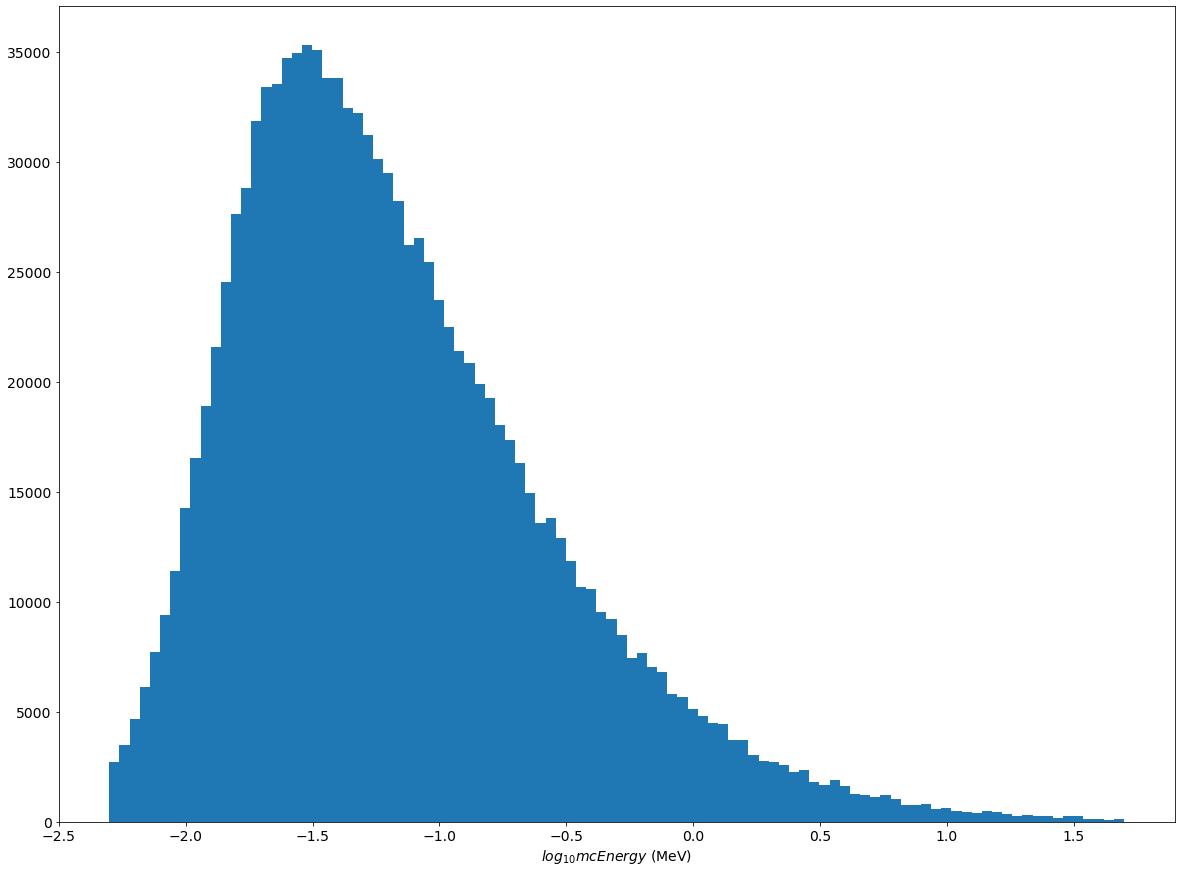

In [7]:
#We can plot some distributions:

plt.hist(data['log_mc_energy'],bins=100) #Log10(Energy) in MeV
plt.xlabel('$log_{10} mcEnergy$ (MeV)')

## Intensity

Text(0.5, 0, '$log_{10} intensity$')

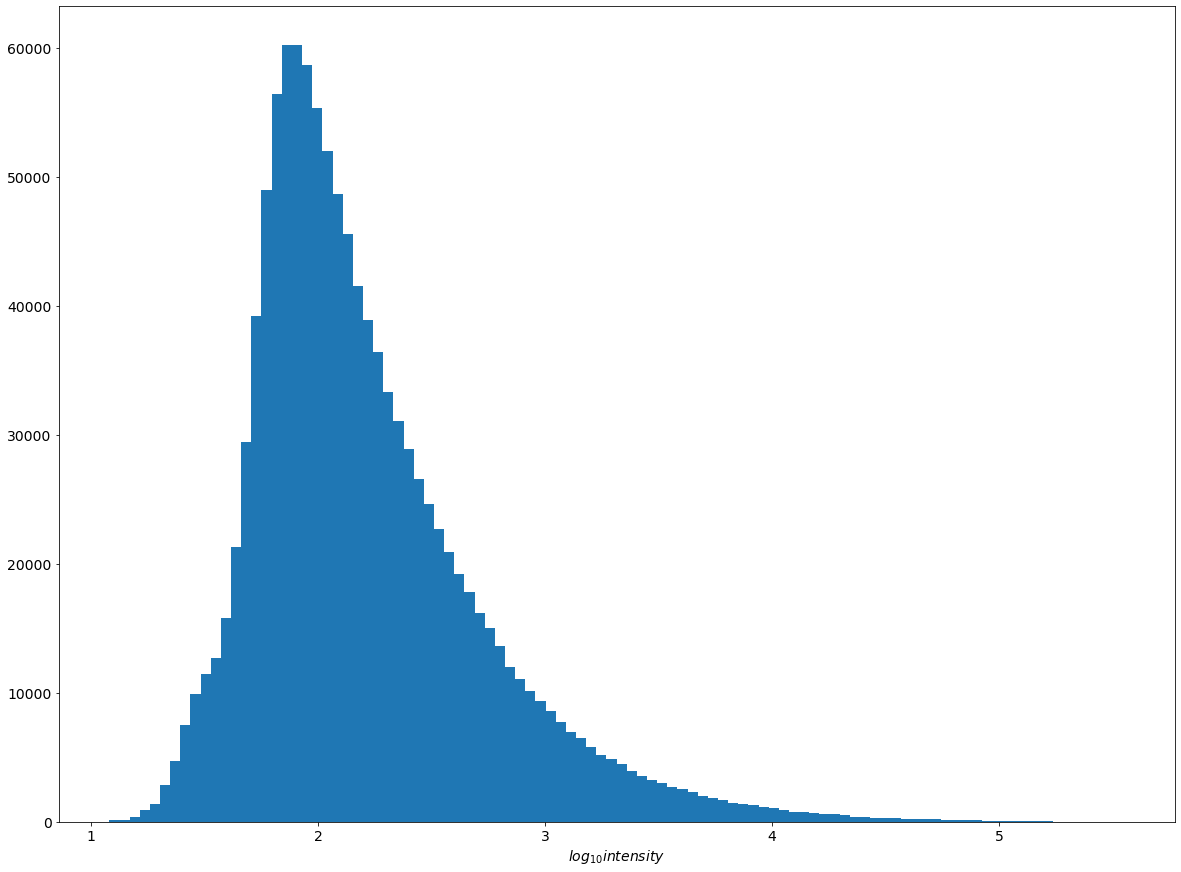

In [8]:
plt.hist(data['log_intensity'],bins=100) #Log10(intensity(size))
plt.xlabel('$log_{10} intensity$')

# Width

/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'width (º)')

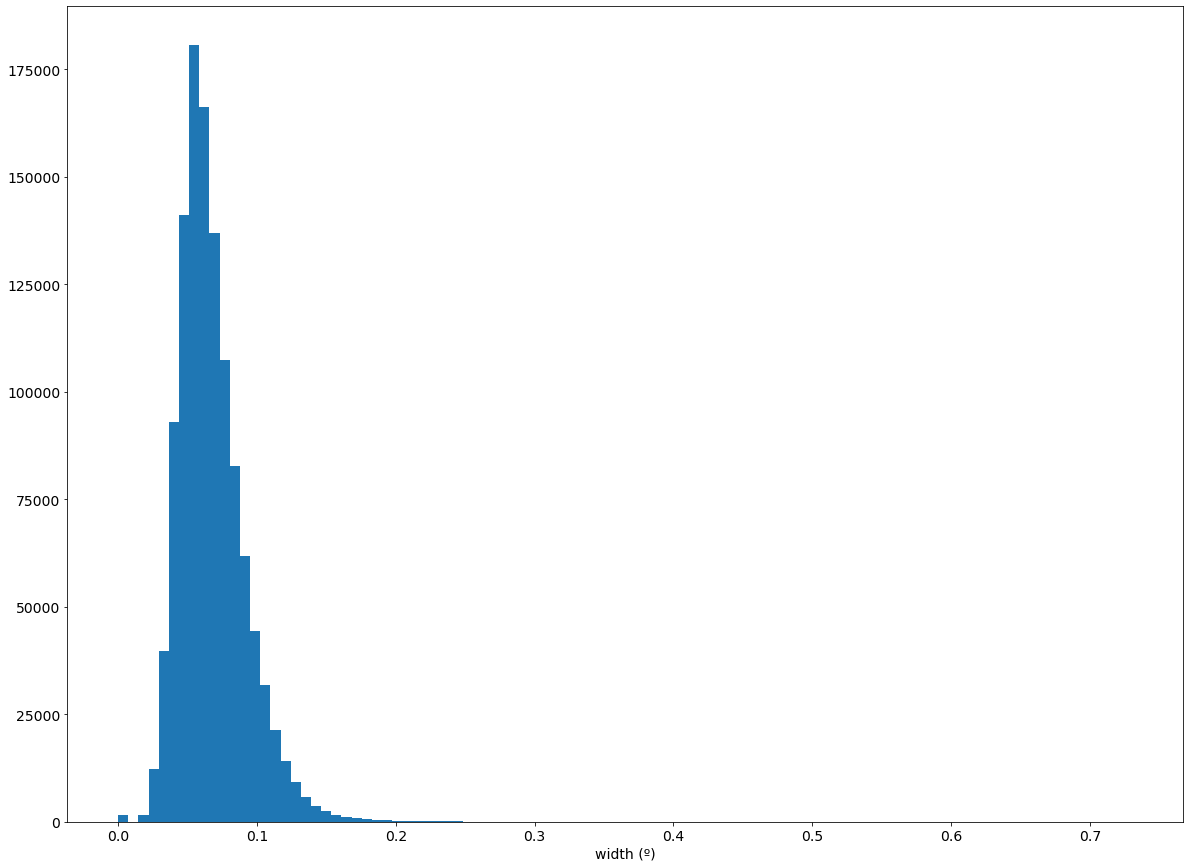

In [9]:
plt.hist(data['width'],bins=100) #Width in deg.
plt.xlabel('width (º)')

# Length

Text(0.5, 0, 'length (º)')

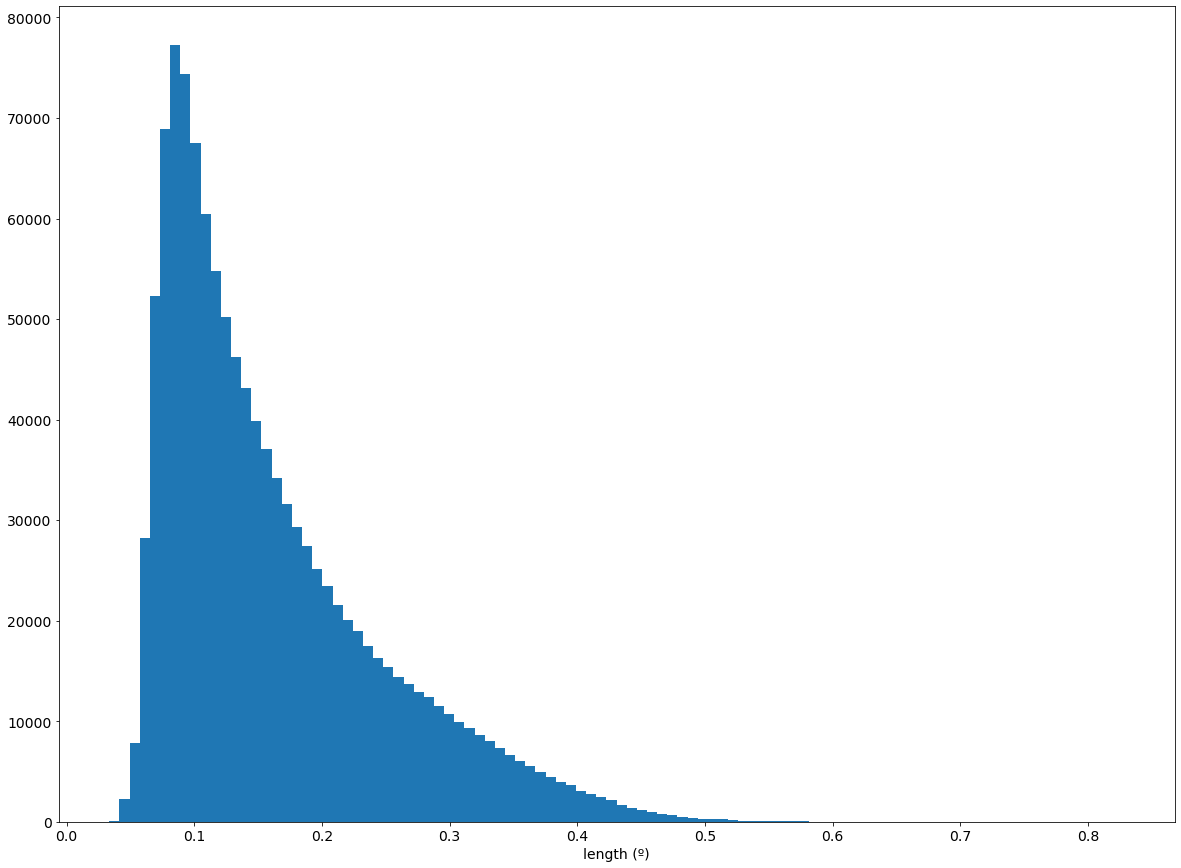

In [10]:
plt.hist(data['length'],bins=100) #Length in deg. 
plt.xlabel('length (º)')

## Source position in camera coordinates

Text(0, 0.5, 'y (m)')

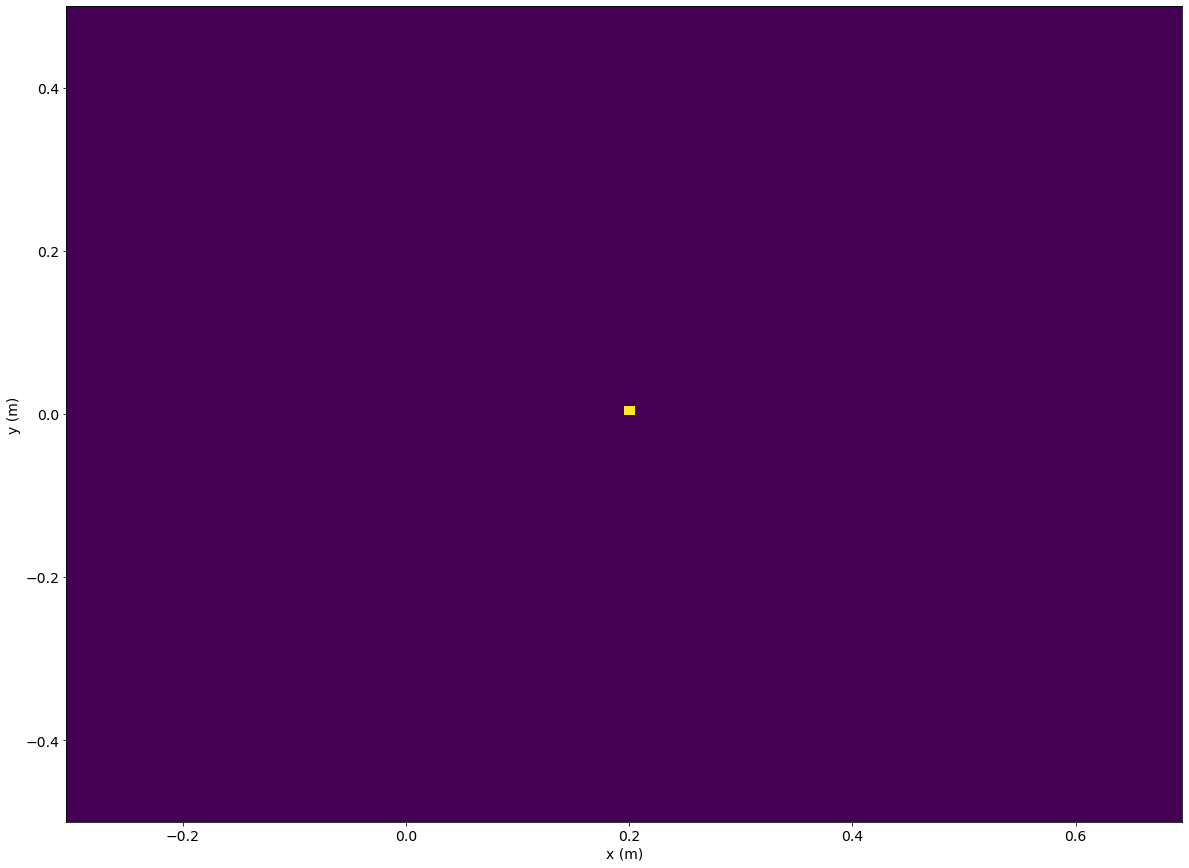

In [11]:
plt.hist2d(data['src_x'],data['src_y'],bins=100)
plt.xlabel('x (m)')
plt.ylabel('y (m)')

## Center of gravity of Hillas ellipse in camera coordinates

Text(0, 0.5, 'y (m)')

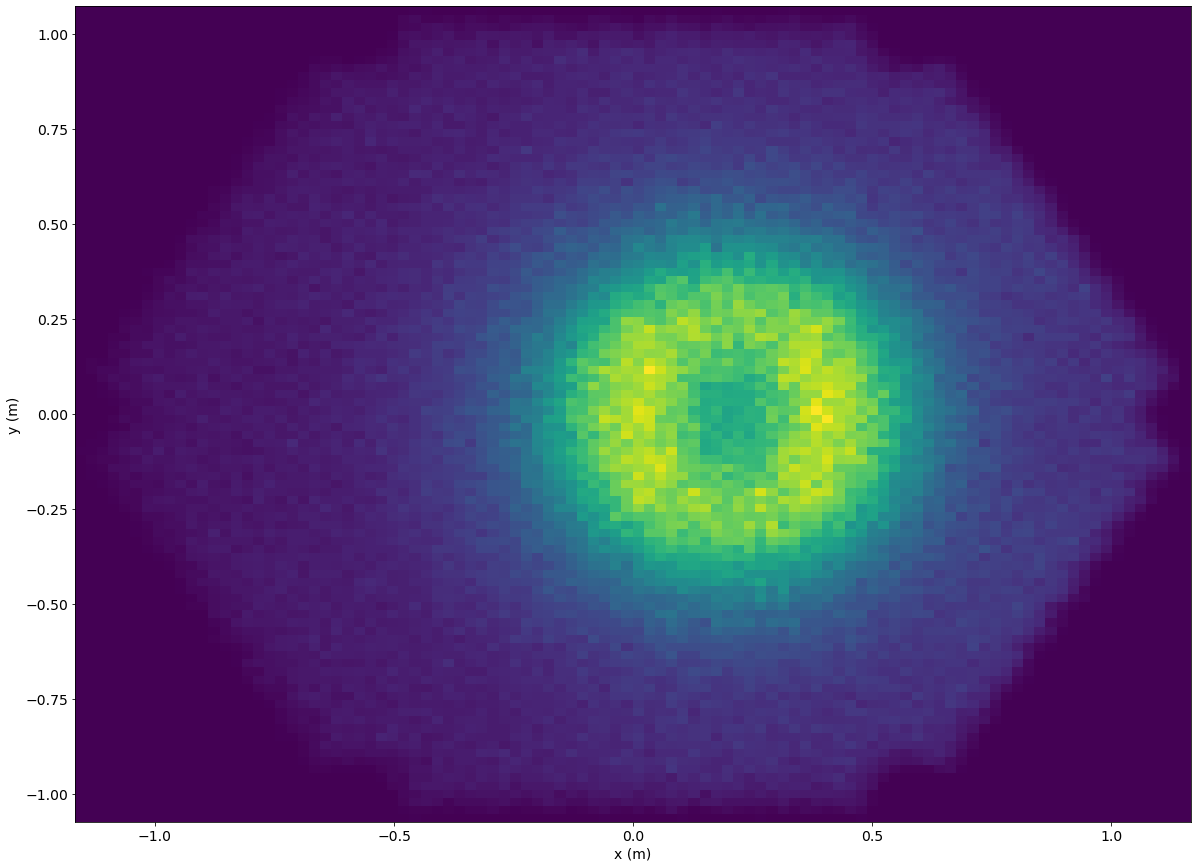

In [12]:
plt.hist2d(data['x'],data['y'],bins=100)
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Import the Random Forests previously trained


In [13]:
#path_models = "." # if you are in ~/lstchain/notebooks

# Assuming you are running the notebook in ~/cta-lstchain/notebooks
#path_models = "../../cta-lstchain-extra/reco/models"  

# otherwise, the corresponding RF to load
path_models = "/fefs/aswg/data/models/20190415/south_pointing/20200514_v0.5.1_v01"  

fileE = path_models + "/reg_energy.sav"                                                            
fileD = path_models + "/reg_disp_vector.sav"                                                              
fileH = path_models + "/cls_gh.sav"                                                                

RFreg_Energy = joblib.load(fileE)                                                                         
RFreg_Disp = joblib.load(fileD)                                                                           
RFcls_GH = joblib.load(fileH)


## Features for prediction:


In [14]:
# We are going to take them from the standard configuration

config = get_standard_config()
config['regression_features']

['log_intensity',
 'width',
 'length',
 'x',
 'y',
 'psi',
 'phi',
 'wl',
 'skewness',
 'kurtosis',
 'r',
 'time_gradient',
 'leakage2_intensity',
 'n_islands']

<font size="4">
Now we can apply the Random Forests to the data and reconsctruct the energy, direction and Gamma/Hadron classification

In [15]:
#Now we have the trained RF that we can use to reconstruct our data into dl2 format:

from lstchain.reco.utils import filter_events

data = filter_events(data)


data_dl2 = reco.apply_models(data, 
                             RFcls_GH, 
                             RFreg_Energy, 
                             RFreg_Disp, 
                             config)
print(data_dl2.keys())

/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/ctapipe/coordinates/__init__.py:50: MissingFrameAttributeWarning: AltAz coordinate has no obstime, assuming same frame
  MissingFrameAttributeWarning,
/home/luca.foffano/workspace/software/miniconda3/envs/lst/lib/python3.7/site-packages/ctapipe/coordinates/__init__.py:58: MissingFrameAttributeWarning: Horizontal coordinate has no location, assuming same frame
  MissingFrameAttributeWarning,


Index(['concentration_cog', 'concentration_core', 'concentration_pixel',
       'event_id', 'gps_time', 'intensity', 'intercept', 'kurtosis',
       'leakage1_intensity', 'leakage1_pixel', 'leakage2_intensity',
       'leakage2_pixel', 'length', 'log_intensity', 'log_mc_energy', 'mc_alt',
       'mc_alt_tel', 'mc_az', 'mc_az_tel', 'mc_core_distance', 'mc_core_x',
       'mc_core_y', 'mc_energy', 'mc_h_first_int', 'mc_type', 'mc_x_max',
       'n_islands', 'n_pixels', 'obs_id', 'phi', 'psi', 'r', 'skewness',
       'tel_id', 'tel_pos_x', 'tel_pos_y', 'tel_pos_z', 'time_gradient',
       'trigger_type', 'width', 'wl', 'x', 'y', 'disp_dx', 'disp_dy',
       'disp_norm', 'disp_angle', 'disp_sign', 'src_x', 'src_y',
       'log_reco_energy', 'reco_energy', 'reco_disp_dx', 'reco_disp_dy',
       'reco_src_x', 'reco_src_y', 'reco_alt', 'reco_az', 'reco_type',
       'gammaness'],
      dtype='object')



# Plot the results

    
## Features:
Since we were using a file only with gamma events, here we can notice the events that has been badly classified as protons.    

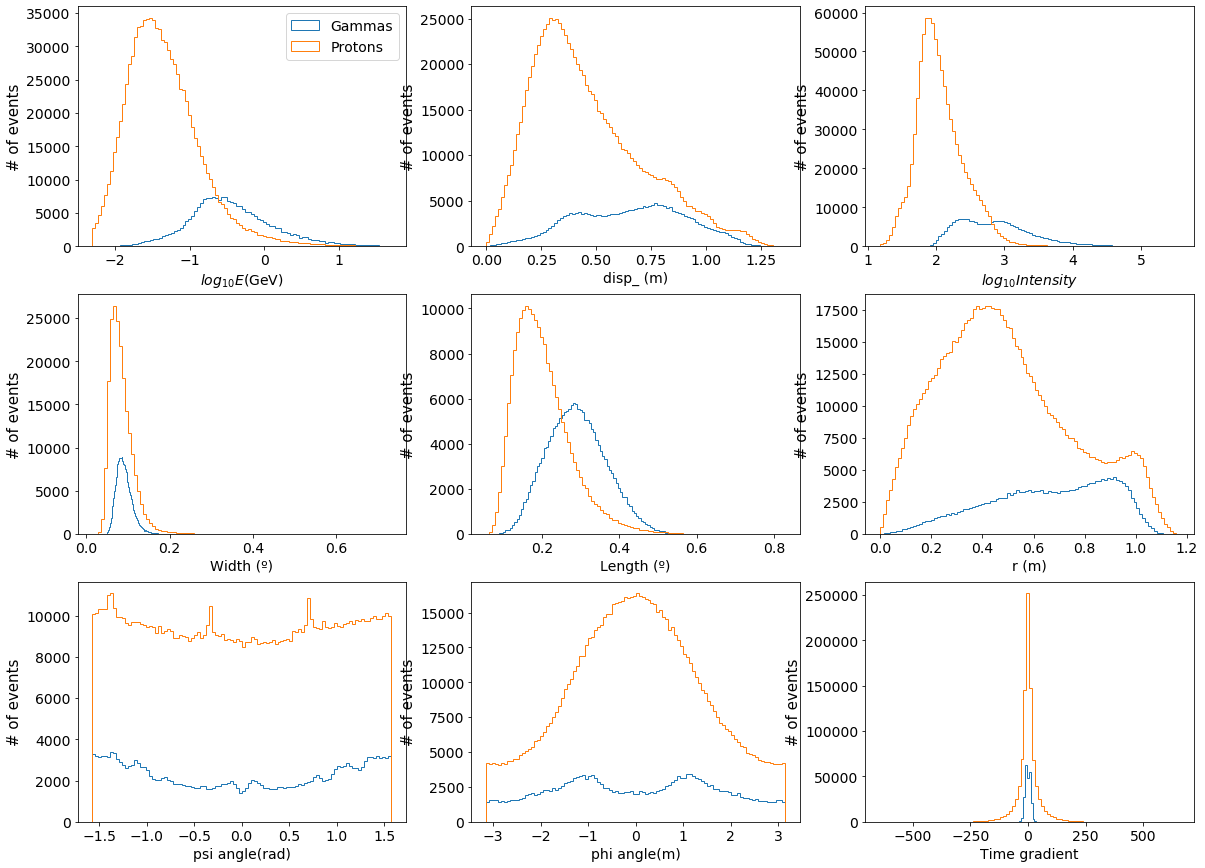

In [16]:
# Let's take a look to the results


lstplot.plot_features(data_dl2)
                      


## Energy reconstruction





(<Figure size 864x576 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1dc1b2450>,
       dtype=object))

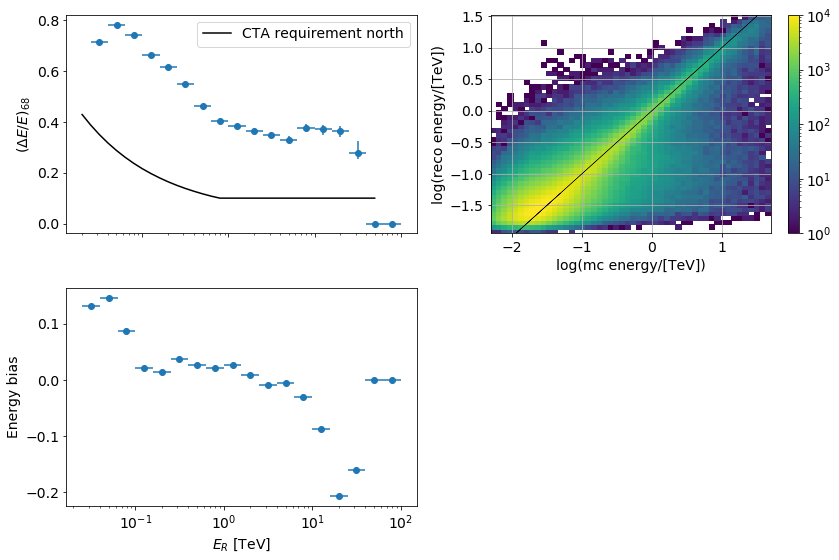

In [17]:
lstplot.energy_results(data_dl2)

# Disp reconstruction

mu = 0.02353091096051025
 sigma = 0.18868411823283618


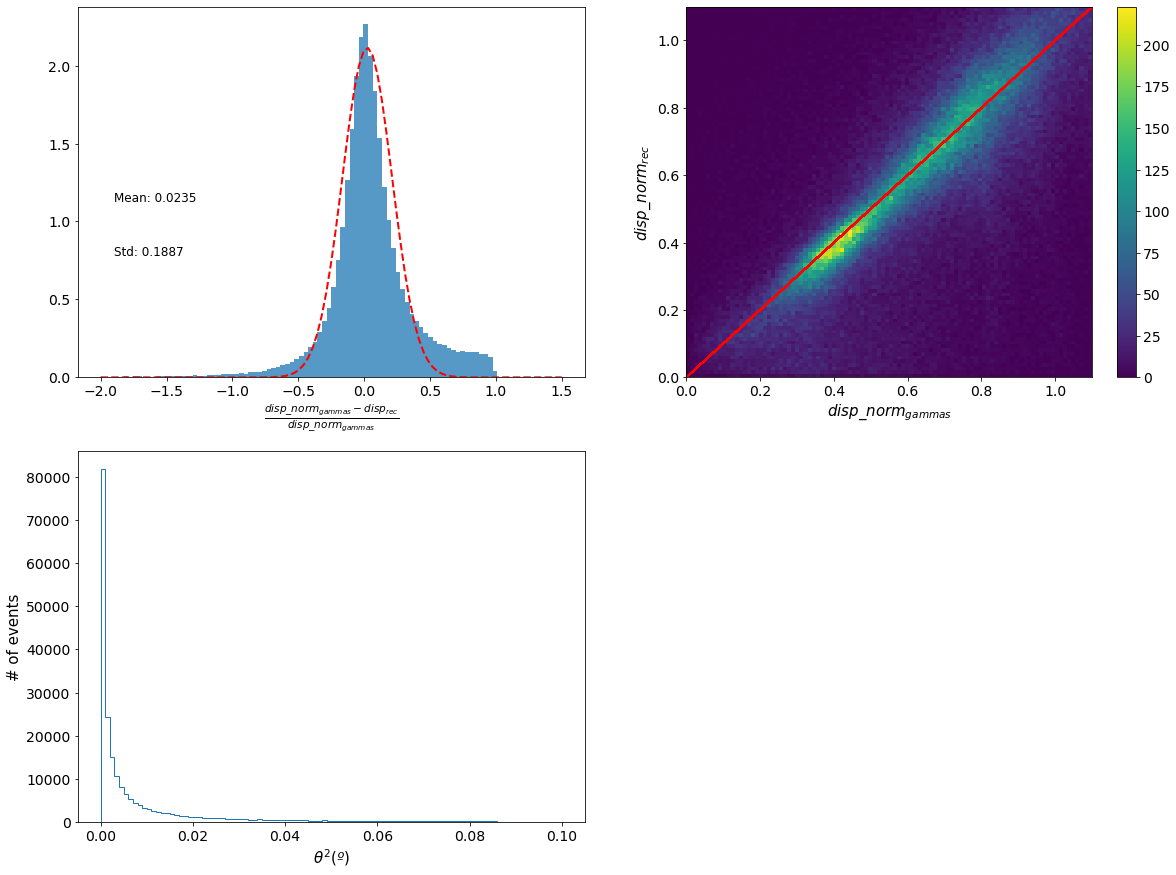

In [18]:
lstplot.plot_disp(data_dl2)

# Reconstructed source position in camera coordinates

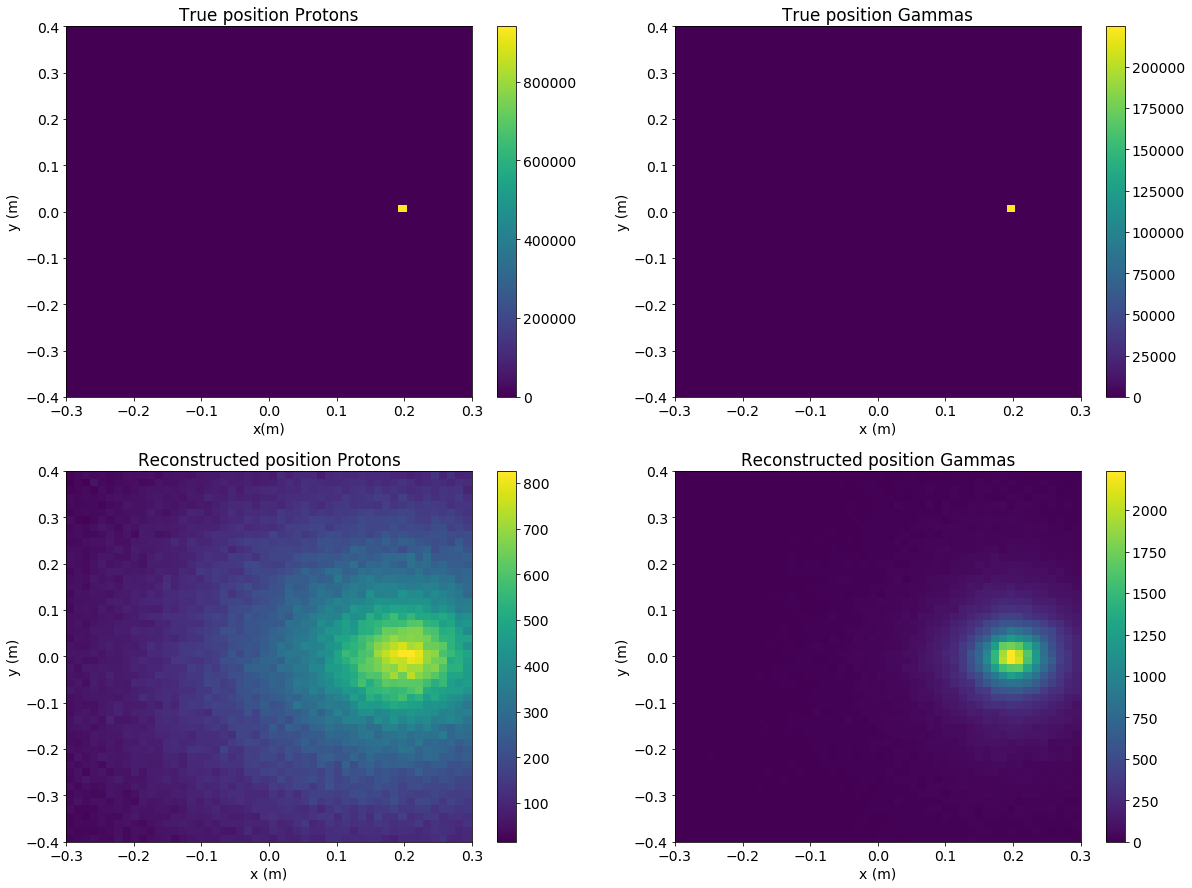

In [19]:
lstplot.plot_pos(data_dl2)

# RHadroness

Text(0.5, 0, 'Hadroness')

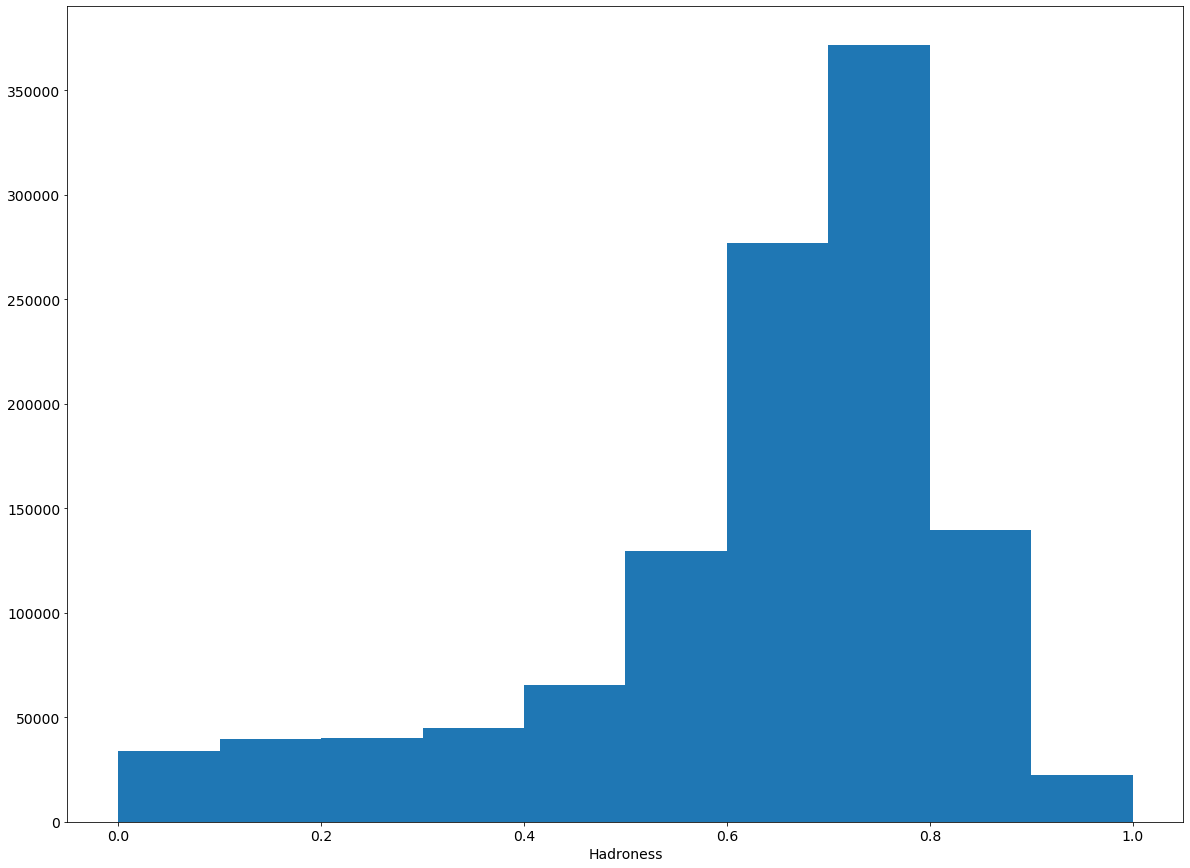

In [20]:
# var `hadro_rec` has been deprecated. And we have loaded a file only of gammas...
# In any case, the gammaness is 1 -  hadronnes.

plt.hist(1-data_dl2['gammaness'])
plt.xlabel('Hadroness')
